<a href="https://colab.research.google.com/github/Lu1sV1rus/EDP/blob/main/Ecuaci%C3%B3n_del_calor_M%C3%A9todo_de_Richardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=9> Método implícito de Richardson </font>

----

<font size=4 color="skyblue">
Escribir el problema a resolver, la ecuación en diferencias del método y explicar de manera concisa.

Importamos las librerias necesarias

In [21]:
# Librerias
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm                # colormap

Definimos la función <font color="skyblue">f(x)</font>, que nos regresara el valor de <font color="skyblue">x</font> evaluado.

Definimos la Matriz tridiagonal <font color="skyblue"> A

In [22]:
def f(x):
    return np.sin(np.pi*x)

A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])
A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

<font size=4 color="skyblue">Ejercicio 1: </font>
<font size=4> Codificar la matriz A de manera más simple.</font>

----

Creamos variables que reutilizaremos, para la creacion de las matrices:

<font color="skyblue"> $n$ </font> es el tamaño de la matriz

<font color="skyblue"> $dp$ </font> es el valor en la diagonal principal

<font color="skyblue"> $ds$ </font> es el valor en las diagonales superior e inferior

In [129]:
# Tamaño de la Matriz A_nxn
n=9
# Variables
dp = 3      # Valor en la diagonal principal
ds = -1     # Valor en las diagonales superior e inferior

<font size=3 color="tomato">Matriz $A$ usando NumPy </font>

<p><font color="tomato"> np.dialog </font> Sirve para sustituir valores en una diagonal;</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;El valor a sustituir <font color="tomato"> $dp=$ 3 </font> ó  <font color="tomato"> $ds=$ -1 </font></p><p>
&nbsp;&nbsp;&nbsp;&nbsp;La posicion que sustituira <font color="tomato"> $k$ </font> (<font color="tomato"> 0, 1, -1 </font>)</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Donde </p><p>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;k=0 es la diagonal principal</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;k=1,-1 son las diagonales superior e inferior respectivamente.</p><p>
<font color="tomato">np.full</font> Sirve para indicar que todos los valores en la diagonal son iguales; </p><p>
&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato"> $n$ </font> el numero de valores, en este caso <font color="tomato"> 9 </font>en la matriz principal y <font color="tomato"> 8 </font>en la matriz secundaria</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;Mientras que el segundo numero, es el valor de la diagonal, ya sea <font color="tomato"> $dp=$ 3 </font> ó  <font color="tomato"> $ds=$ -1 </font></p>

In [128]:
A_np = sp.Matrix(                          # Creamos la matriz con sp, para que tenga el mismo formato
        np.diag(np.full(n, dp)) +          # Indicamos que la diagonal principal sean 3, 9x3
        np.diag(np.full(n-1, ds), k=1) +   # Indicamos que la diagonal superior sean -1, 8x1
        np.diag(np.full(n-1, ds), k=-1))   # Indicamos que la diagonal inferior sean -1, 8x1

print("Matriz A usando NumPy \n")
A_np

Matriz A usando NumPy 



Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

<font size=3 color="purple">Matriz $A$ usando el ciclo For </font>

<p><font color="purple"> sp.zeros </font> Sirve para crear una matriz $A$ de tamaño <font color="purple"> $nxn$ </font> de puros ceros
</p><p>
Iniciamos un ciclo for de tamaño <font color="purple"> $n$ </font>
</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> A_for$[i, i]$ </font> indica que en las diagonales sustituira los ceros por <font color="purple"> $dp$ </font> (<font color="purple"> 3 </font>)
</p><p>
Creamos una condicion: <font color="purple"> $i > 0$ </font>, es decir, apartir de la segunda iteracion, incluira un <font color="purple"> -1 </font>, a la izquierda
</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> A_for$[i, i-1]$ </font> indica que los valores en la diagonal inferior se deben sustituir por <font color="purple"> $ds$ </font> (<font color="purple"> -1 </font>)
</p><p>
Creamos otra condicion: <font color="purple"> $i < n-1$ </font>, es decir, incluira un <font color="purple"> -1 </font>, a la derecha, en todo el ciclo, menos en la ultima iteracion.
</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> A_for$[i, i+1]$ </font> indica que los valores en la diagonal superor se deben sustituir por <font color="purple"> $ds$ </font> (<font color="purple"> -1 </font>)</p>

In [130]:
# Crear la matriz A (N x N) con ceros
A_for = sp.zeros(n, n)

# Un ciclo for que cree las diagonales
for i in range(n):
    A_for[i, i] = dp            # Diagonal (i, i)

    if i > 0:
        A_for[i, i-1] = ds      # Diagonal Inferior (i, i-1)

    if i < n - 1:
        A_for[i, i+1] = ds      # Diagonal Superior (i, i+1)

print("Matriz A usando un ciclo For \n")
A_for

Matriz A usando un ciclo For 



Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [131]:
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

<font size=4 color="skyblue">Ejercicio 2: </font>
<font size=4> Definir las entradas de b de manera más simple (quizás con un bucle).

----

Creamos variables que reutilizaremos, para la creacion de las matrices:

<font color="skyblue"> $nb$ </font> es el tamaño de la matriz <font color="skyblue"> $b$ </font>

In [132]:
nb=9

<font size=3 color="tomato">Matriz $b$ usando un ciclo For </font>

<p><font color="tomato"> sp.zeros </font> Sirve para crear una matriz $b$ de tamaño <font color="tomato"> $nb$x$1$ </font> de puros ceros
</p><p>
Iniciamos un ciclo for de tamaño <font color="tomato"> $nb$ </font>
</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;
<font color="tomato"> b$[i]$ </font> es la posicion que se cambiara por <font color="tomato"> $f(0.1*(i+1))$ </font>
</p><p>&nbsp;&nbsp;&nbsp;&nbsp;
(esta inicia en $i+1$, ya que el primer valor de b es 1, mientras que el ciclo for inicia en 0)</p>

In [133]:
b1 = sp.zeros(nb,1)

for i in range(nb):
    b1[i] = f(0.1*(i+1))
b1

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

<font size=3 color="purple">Matriz $b$ usando un ciclo For (version corta)</font>

<p><font color="purple"> sp.Matrix </font> Sirve para crear una matriz que contiene una "lista" de valores <font color="purple"> $f(x)$ for $i$ in range ($nb$)</font> con los valores correspondientes de b
</p><p>
El ciclo for es de tamaño <font color="purple"> $nb$ </font>
</p><p>
<font color="purple"> $f(0.1*(i+1))$ </font> es funcion que se itera <font color="purple"> $i$ </font> veces, evaluada en el valor <font color="purple"> $0.1*(i+1)$ </font></p><p>
&nbsp;&nbsp;&nbsp;&nbsp;(esta inicia en $i+1$, ya que el primer valor de b es 1, mientras que el ciclo for inicia en 0)</p>

In [134]:
b2 = sp.Matrix([f(0.1*(i+1)) for i in range(nb)])
b2

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

<font size=4 color="skyblue">Solución: </font>


<font size=2> A modo de comprobación verificare que las soluciones son iguales.

----


In [135]:
S1=A.LUsolve(b)
S2=A_np.LUsolve(b1)
S3=A_for.LUsolve(b2)

In [144]:
print("Metodo 1       | Metodo 2       | Metodo 3       | Dif 1-2 | Dif 1-2     ")
for i in range(nb):
    print(f"{S1[i]:.12f} | {S2[i]:.12f} | {S3[i]:.12f} | {abs((S1[i]-S2[i])):.5f} | {abs((S2[i]-S3[i])):.5f}")

Metodo 1       | Metodo 2       | Metodo 3       | Dif 1-2 | Dif 1-2     
0.281465217776 | 0.281465217776 | 0.281465217776 | 0.00000 | 0.00000
0.535378658952 | 0.535378658952 | 0.535378658952 | 0.00000 | 0.00000
0.736885506787 | 0.736885506787 | 0.736885506787 | 0.00000 | 0.00000
0.866260867035 | 0.866260867035 | 0.866260867035 | 0.00000 | 0.00000
0.910840578024 | 0.910840578024 | 0.910840578024 | 0.00000 | 0.00000
0.866260867035 | 0.866260867035 | 0.866260867035 | 0.00000 | 0.00000
0.736885506787 | 0.736885506787 | 0.736885506787 | 0.00000 | 0.00000
0.535378658952 | 0.535378658952 | 0.535378658952 | 0.00000 | 0.00000
0.281465217776 | 0.281465217776 | 0.281465217776 | 0.00000 | 0.00000


<font size=4 color="skyblue">Aplicar iteradamente Richardson: </font>


<font size=2> Codigo correspondiente aún bucle de soluciones de richarson

----

Iteracion n+1

In [ ]:
def richardson_1(A, b, j):
    b_1 = b
    for i in range(j+1):
        sol = A.LUsolve(b_1)
        b_1 = sol
        _ = None #Para que no imprima resultados parciales
    return b_1

print("Siguiente Iteracion")
richardson_1(A, b, 3)

Siguiente Iteracion


Matrix([
[0.212692337894623],
[0.404564867841463],
[  0.5568357697548],
[0.654599706821597],
[0.688286863720354],
[0.654599706821597],
[  0.5568357697548],
[0.404564867841463],
[0.212692337894623]])

----

Iteracion n=0, n+1, n+2, n+3

In [24]:
def richardson(A, b, j):
    S = []
    b_1 = b.copy()

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # vector fila
        sol = A.LUsolve(b_1)
        b_1 = sol

    return np.array(S)   # matriz resultado

print("Siguientes Iteraciones; n --> n+3 \n")
sp.Matrix(richardson(A, b, 3))

Siguientes Iteraciones; n --> n+3 



Matrix([
[0.309016994374947, 0.587785252292473, 0.809016994374947, 0.951056516295154,               1.0, 0.951056516295154, 0.809016994374947, 0.587785252292473, 0.309016994374948],
[0.281465217775586, 0.535378658951812, 0.736885506787377,  0.86626086703537,  0.91084057802358,  0.86626086703537, 0.736885506787377, 0.535378658951812, 0.281465217775587],
[0.256369941652248, 0.487644607181158, 0.671185220939413, 0.789025548849704, 0.829630558574329, 0.789025548849704, 0.671185220939413, 0.487644607181158, 0.256369941652248],
[0.233512145842405, 0.444166495874967, 0.611342734601339, 0.718676486989637, 0.755661177517868, 0.718676486989637, 0.611342734601339, 0.444166495874967, 0.233512145842405]])

<font size=4 color="skyblue">Ejercicio 4: </font> <font size=4> Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).</font>



In [91]:
L = 1.0                 # Longitud del dominio
dx = L / (n + 1)        # Tamaño de paso
j = 60                  # El numero de iteraciones
t = 0.6                 # Intervalo de tiempo
dt = t / j              # Tamaño de intervalo de tiempo

def u_exacta(x, t, alpha=1.0):
    return np.exp(-alpha * (np.pi**2) * t) * np.sin(np.pi * x)

In [110]:
U = richardson(A, b, j) # Resolvemos con Richarson

mitad = int(j*0.5)      # Calculamos la mitad de las iteraciones -> j*0.5
t_medio = mitad * dt    # Calculamos el tiempo medio -> t*0.5
u_m = U[mitad, :]       # Calculamos el valor en U

x = np.linspace(0, 1, 9)               # Creamos la maya de 0.1 a 0.9
u_ex = u_exacta(x, t_medio, alpha=1.0) # Calculamos el valor exacto

In [112]:
v_ex=sp.Matrix(u_ex)       # Guardamos los valores en una matriz de sympy
v_ex

Matrix([
[                 0.0],
[  0.0198127719896124],
[  0.0366092290470317],
[  0.0478322628455281],
[  0.0517732682263353],
[  0.0478322628455281],
[  0.0366092290470317],
[  0.0198127719896124],
[6.34039672147788e-18]])

In [113]:
v_es=sp.Matrix(u_m)        # Guardamos los valores en una matriz de sympy
v_es

Matrix([
[0.0187608914640572],
[0.0356853361567954],
[0.0491166515121494],
[0.0577400868016604],
[0.0607115200961845],
[0.0577400868016604],
[0.0491166515121494],
[0.0356853361567954],
[0.0187608914640571]])

In [146]:
# Grafica
plt.figure(figsize=(10, 6))
plt.plot(x,(v_es), label='Valor estimado')
plt.plot(x,(v_ex), label='Valor exacto')
plt.title('Comparación de Solución Numérica vs Exacta en t')
plt.xlabel('Posición x')
plt.ylabel('Temperatura u(x, t)')
plt.legend()
plt.grid()
plt.show()
plt.savefig('Comparación de Solución Numérica vs Exacta en t')

<IPython.core.display.Javascript object>

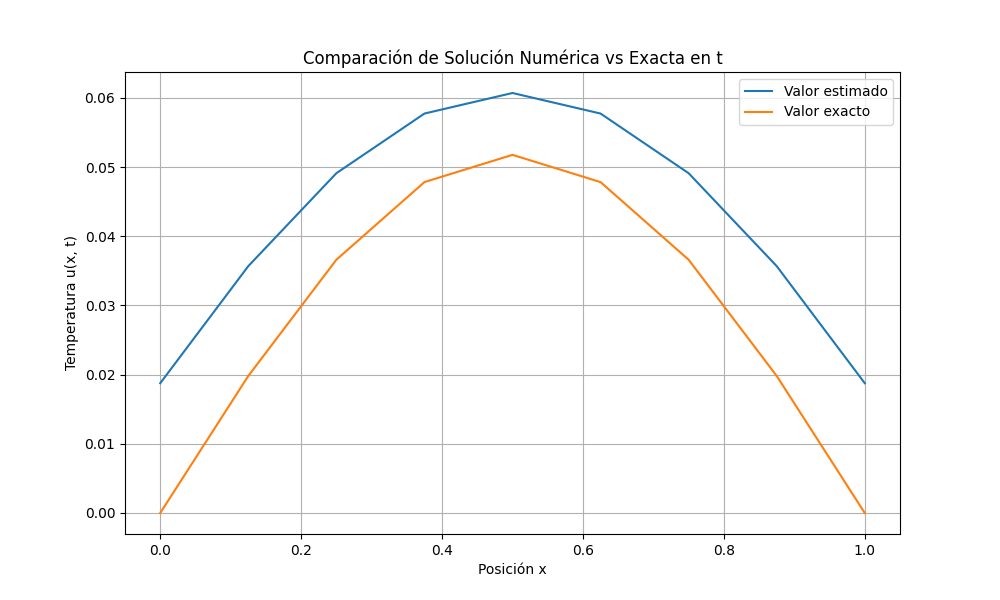

In [145]:
# Comparamos los valores
print("Valor exacto   | Valor estimado | Diferencia")
for i in range(n):
    print(f"{v_ex[i]:.12f} | {v_es[i]:.12f} | {abs(v_ex[i]-v_es[i]):.12f}")

Valor exacto   | Valor estimado | Diferencia
0.000000000000 | 0.018760891464 | 0.018760891464
0.019812771990 | 0.035685336157 | 0.015872564167
0.036609229047 | 0.049116651512 | 0.012507422465
0.047832262846 | 0.057740086802 | 0.009907823956
0.051773268226 | 0.060711520096 | 0.008938251870
0.047832262846 | 0.057740086802 | 0.009907823956
0.036609229047 | 0.049116651512 | 0.012507422465
0.019812771990 | 0.035685336157 | 0.015872564167
0.000000000000 | 0.018760891464 | 0.018760891464


<font size=4 color="skyblue">Ejercicio 5: </font> <font size=4>¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

In [149]:
j = 20 # Número de pasos en el tiempo
U = richardson(A, b, j)
x = np.linspace(0, 1, 9) #Número de nodos internos en X-

In [150]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
plt.savefig('Solución numérica de un problema de Dirichlet')

<IPython.core.display.Javascript object>

Explicar la gráfica

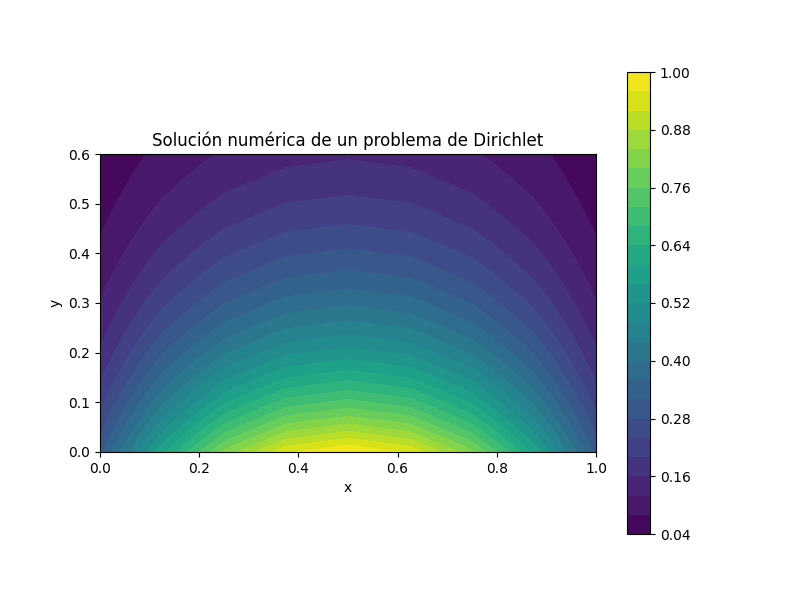

Podemos observar que el calor se difusa en de forma de ondas

In [151]:
#%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

<IPython.core.display.Javascript object>

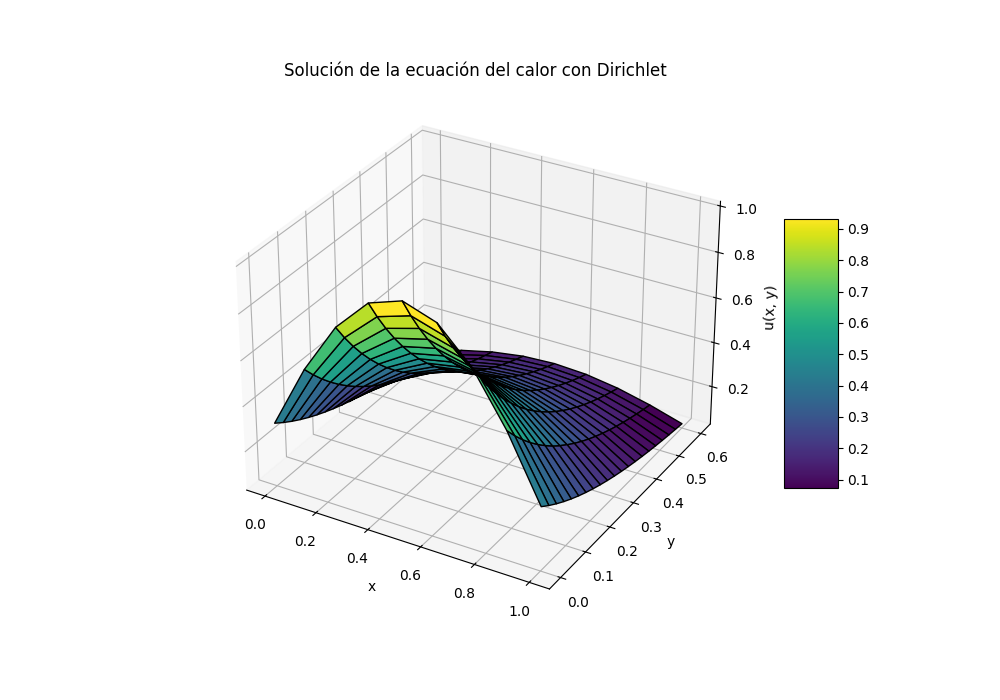

<font size=4 color="skyblue">Ejercicio 6: </font> <font size=4>Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?